<a href="https://colab.research.google.com/github/brkent/SummerStudent2020/blob/master/VLAimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:

# Loading and displaying FITS images

# IMPORTS ----------------------------------
from astropy.io import fits
from astropy import wcs

import numpy as np
import matplotlib.pyplot as plt

# VARIABLES -------------------------------
RA =   ( 7.0 +17.0/60.0  +8.00/3600.0) * 15.0
DEC = -(36.0 +21.0/60.0 +58.75/3600.0)
HALF_Width = 92   #(92 pixels is approx. 1.5 arcminutes)
drivedir = '/content/drive/My Drive/Colab Notebooks/'
VLASS_FITS = drivedir+'VLASSimage.fits'

#Exercises for NINE guys:
# Take a look at exploring the FITS header
# Understand the image projection
# Use the example to manipulate the image and coordinates


In [0]:
#1 open VLASS File. This contains HEADER and DATA
hdulist = fits.open(VLASS_FITS)

#2 Use the VLASS FITS header data to create a world coordinate system(wcs)
w = wcs.WCS(hdulist[0].header)

#3 get all the raw data from the VLASS file
VLASS_image_data = fits.getdata(VLASS_FITS)[0,0,:,:]

#4 Put the coordinates into an Array for AstroPy
world = np.array([[RA, DEC, 0.0, 0.0]], np.float_)


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [0]:

#5 Use the WCS to convert from RA/DEC to pixel locations on the image
Pixel_Coord = w.wcs_world2pix(world,1)
x = int(round(Pixel_Coord[0][1]))
y = int(round(Pixel_Coord[0][0]))

#6 create 4 corners of cutout
lower_x = x - HALF_Width
upper_x = x + HALF_Width

lower_y = y - HALF_Width
upper_y = y + HALF_Width

#7 Use the pixel coordinates to make cutout
vlasscutout = VLASS_image_data[lower_x:upper_x,lower_y:upper_y]


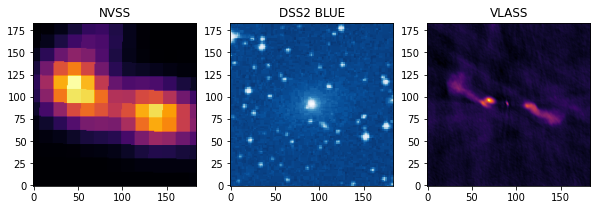

In [0]:

#8 Plot onto figure with Matplotlib
fig = plt.figure(figsize=(10,3), facecolor='white', edgecolor='black')
ax1 = fig.add_subplot(131)
NVSSFITS = drivedir+'nvss.fits'
NVSS_image_data = fits.getdata(NVSSFITS)
ax1.imshow(NVSS_image_data, origin='lower', cmap='inferno')
plt.title('NVSS')


ax2 = fig.add_subplot(132)
DSS2BLUEFITS = drivedir+'dss2blue.fits'
DSS2BLUE_image_data = fits.getdata(DSS2BLUEFITS)
ax2.imshow(DSS2BLUE_image_data, origin='lower', cmap='Blues_r')
plt.title('DSS2 BLUE')

ax3 = fig.add_subplot(133)
ax3.imshow(vlasscutout, origin='lower', cmap='inferno')
plt.title('VLASS')

plt.show()